In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

In [93]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

def mse(x):
    mn = x.mean()
    print(mn)

class NeuralNetwork:
    def __init__(self):
        self.Layers = []
        pass
    
    def addLayer(self, x, y):
        self.Layers.append(Layer_Dense(x, y))
        
    def train(self, X_train, X_test, lr, epochs, verbose):
        self.mse_list = []
        for e in range(epochs):
            epc_error = 0
            for row in range(len(X_train)):
                X = X_train[row]
                for L in self.Layers:
                    L.forward(X)
                    X = L.output

                d_weights = [] 
                error = X_test[row] - L.output
                epc_error = mean_squared_error(X_test[row], L.output)
        
                for i in range(len(self.Layers)-1, 0, -1):
                    L = self.Layers[i]
                    Lp = self.Layers[i-1]
                    cur = np.dot((error*sigmoid_der(L.output)).T, Lp.output)
                    d_weights = [cur] + d_weights
                    error = np.dot(error, L.weights)

                for i in range(1, len(self.Layers)):
                    self.Layers[i].weights += lr*d_weights[i-1]
                    
            if verbose:
                print("Epoch ", (e+1), ": mse = ", epc_error)
            self.mse_list.append(epc_error)
    
    def query(self, X):
        for L in self.Layers:
            L.forward(X)
            X = L.output
        return X[0][0]

class Layer_Dense:
    def __init__(self, n_features, n_neurons):
        self.weights = np.random.normal(0, 1, (n_neurons, n_features))
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, input):
        self.output = sigmoid(np.dot(input, self.weights.T) + self.biases)

In [94]:
df = pd.read_csv('dataset.csv', header=None)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=0)

In [99]:
NN = NeuralNetwork()
NN.addLayer(4, 32)
NN.addLayer(32, 64)
NN.addLayer(64, 1)
NN.train(X_train, y_train, 0.001, 50, verbose=False)

In [100]:
y_pred = []
for X in X_test:
    y_pred.append([round(NN.query(X))])
print(accuracy_score(y_pred, y_test))

0.970856102003643


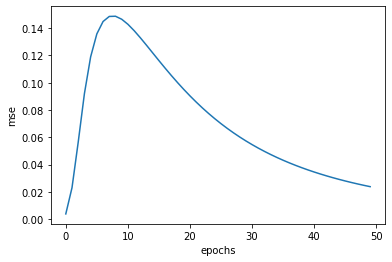

In [101]:
plt.plot(NN.mse_list)
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show()